In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [27]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
data_dup = data.duplicated().any()
data_dup

True

In [30]:
data=data.drop_duplicates()

In [31]:
data_dup = data.duplicated().any()
data_dup

False

In [32]:
cate_val = []
numeric_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        numeric_val.append(column)

In [33]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [34]:
numeric_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [35]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [36]:
if 'sex' in cate_val:
    cate_val.remove('sex')

if 'target' in cate_val:
    cate_val.remove('target')


In [37]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [38]:
data = pd.get_dummies(data, columns=cate_val, drop_first=True).astype(int)
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,175,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,161,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,1,160,273,125,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [39]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [40]:
#we will scale the numeric clumns 
st = StandardScaler()
data[numeric_val] = st.fit_transform(data[numeric_val])



In [41]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [42]:
X=data.drop('target',axis=1)
Y=data['target']

In [43]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [53]:
len(X_train)

241

In [54]:
#after spliting our data, we will now try usinng different algorithms to get a model with the best accuracy
#FIRST WE WILL TRY THE LINEAR ALGORITHMS WHICH ARE (LINEAR_REGRESSION,SVM)
from sklearn.linear_model import LogisticRegression

In [55]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [56]:
y_pred1=lg.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(Y_test,y_pred1)

0.7868852459016393

In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)


SVC()

In [66]:
y_pred2=svm.predict(X_test)

In [68]:
accuracy_score(Y_test,y_pred2)

0.8032786885245902

In [69]:
#NOW WE TRY THE THE NON-LINEAR ALGORITHMS TO GET A BEST FIT MODEL
#NOTE:IN NON-LINEAR ALGORITHMS WE DONE NEED TO SCALE OUR DATA



In [70]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
data=data.drop_duplicates()

In [73]:
data.shape

(302, 14)

In [74]:
X = data.drop('target',axis=1)
Y = data['target']

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
Y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [81]:
y_pred3=dt.predict(X_test)

In [82]:
accuracy_score(Y_test,y_pred3)

0.7377049180327869

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [88]:
y_pred4=rf.predict(X_test)

In [89]:
accuracy_score(Y_test,y_pred3)

0.8360655737704918

In [90]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'DT', 'RF'],
    'Acc': [
        accuracy_score(Y_test, y_pred1),
        accuracy_score(Y_test, y_pred2),
        accuracy_score(Y_test, y_pred3),
        accuracy_score(Y_test, y_pred4)
    ]
})

                             

In [91]:
final_data

,Models,Acc
0,LR,0.786885
1,SVM,0.803279
2,DT,0.836066
3,RF,0.836066


In [92]:
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_10612\1650577512.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Acc', data=final_data, palette='viridis')


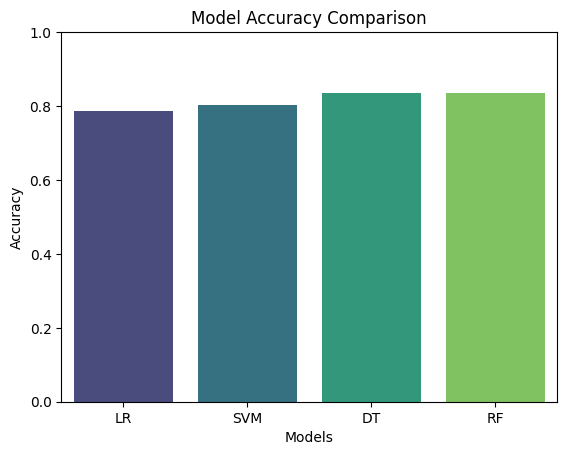

In [98]:
sns.barplot(x='Models', y='Acc', data=final_data, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)  # optional, to keep y-axis consistent for accuracy
plt.show()



In [100]:
#now we will train our best model on our original dataset

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [108]:
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]
}, index=[0])  

 
    
    
    



In [109]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [111]:
p=rf.predict(new_data)
if p[0]==0:
    print("NO Disease")
else:
    print("Yes Disease")

NO Disease


In [112]:
import joblib

In [113]:
joblib.dump(rf,'heart')

['heart']

In [114]:
model= joblib.load('heart')

In [115]:
model.predict(new_data)

array([0], dtype=int64)